In [414]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# Read the data
X_full = pd.read_csv("../input/home-data-for-ml-course/train.csv", index_col='Id')
test_data = pd.read_csv("../input/home-data-for-ml-course/test.csv", index_col='Id')
X_full.head()

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA - Correlations and Visualizations

In [415]:
numeric_cols = X_full.select_dtypes(exclude='object')
categorical_cols = X_full.select_dtypes(include='object')
print("Number of Numeric Columns: ", numeric_cols.shape[1])
print("Number of Categorical Columns: ", categorical_cols.shape[1])

Number of Numeric Columns:  37
Number of Categorical Columns:  43


In [416]:
print('Training set has: ',X_full.shape[0], 'houses', 'and', X_full.shape[1], 'features')
print('Test set has: ',test_data.shape[0], 'houses', 'and', test_data.shape[1], 'features')

Training set has:  1460 houses and 80 features
Test set has:  1459 houses and 79 features


**Temporal Features**

In [417]:
temporal_features=[]
for feat in X_full.columns:
    if any(x in feat for x in ['Year','Yr','Mo']):
        temporal_features.append(feat)
X_full[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,
1,2003,2003,2003.0,2,2008
2,1976,1976,1976.0,5,2007
3,2001,2002,2001.0,9,2008
4,1915,1970,1998.0,2,2006
5,2000,2000,2000.0,12,2008


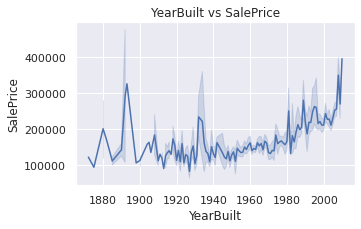

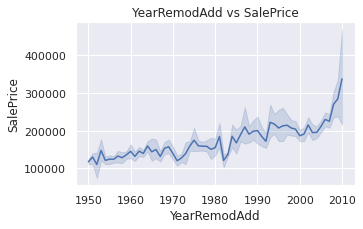

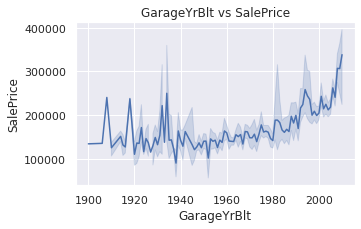

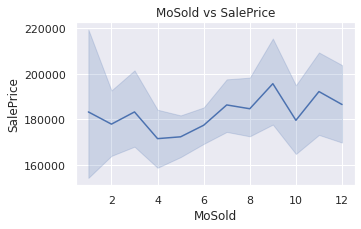

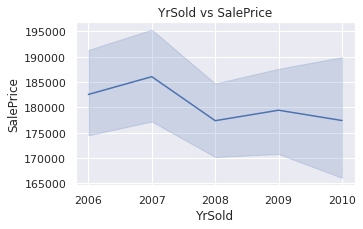

In [418]:
for i,col in enumerate(temporal_features):
    plt.figure(figsize=(5,3))
    sns.lineplot(data=X_full,x=temporal_features[i], y='SalePrice')
    plt.title(temporal_features[i] + " vs " + "SalePrice")
    plt.show()

**Numerical Features with Continuous Values**

There are  19  continuous columns to examine


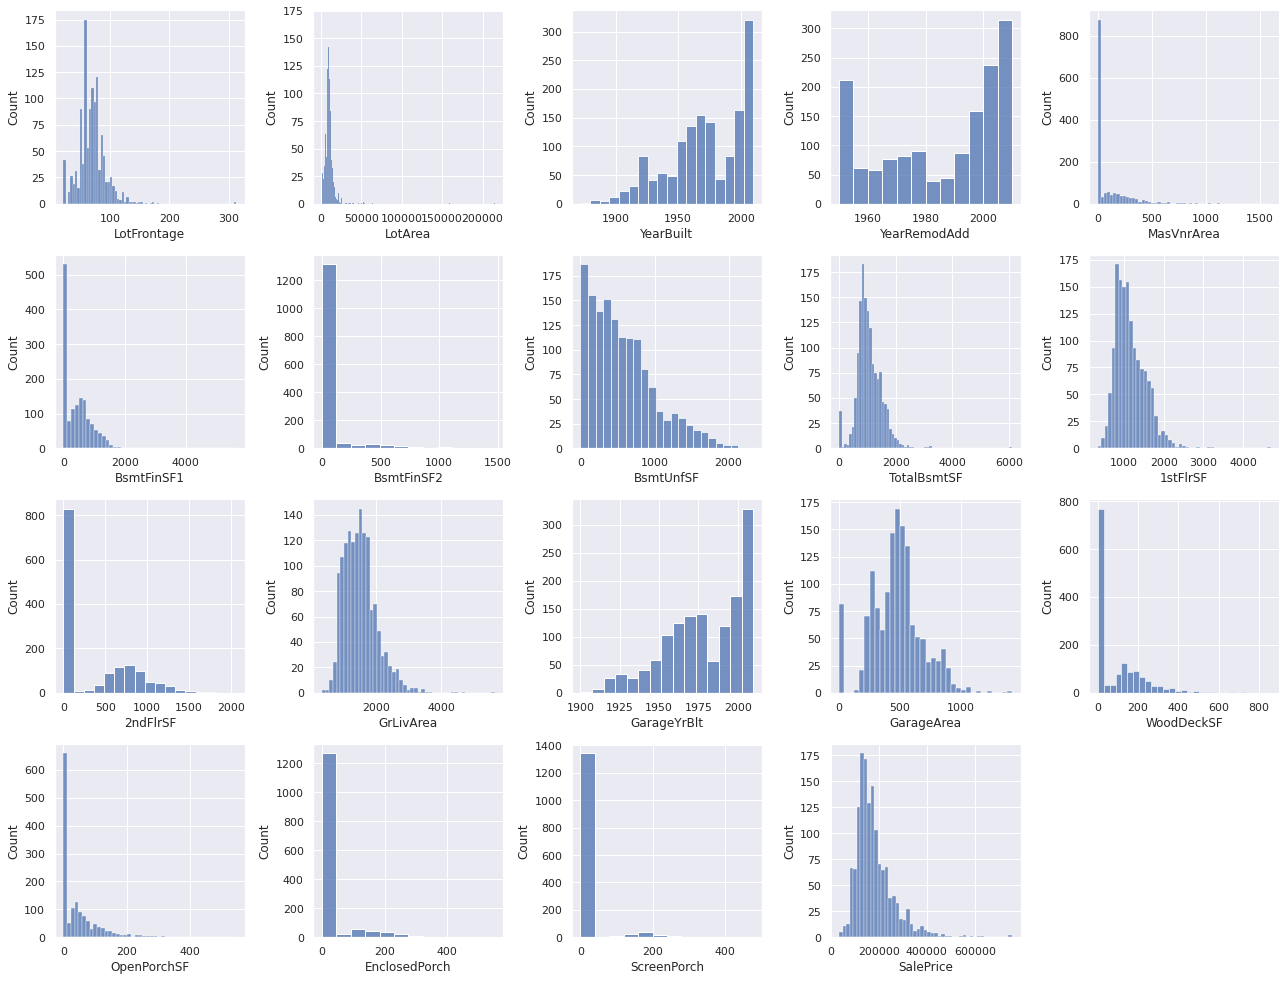

In [419]:
num_cont = numeric_cols.loc[:,numeric_cols.nunique()>25]
print("There are ", num_cont.shape[1], " continuous columns to examine")
fig = plt.figure(figsize=(18,20))
for i,col in enumerate(num_cont.columns,start=1):
    plt.subplot(6,5,i)
    sns.histplot(X_full.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

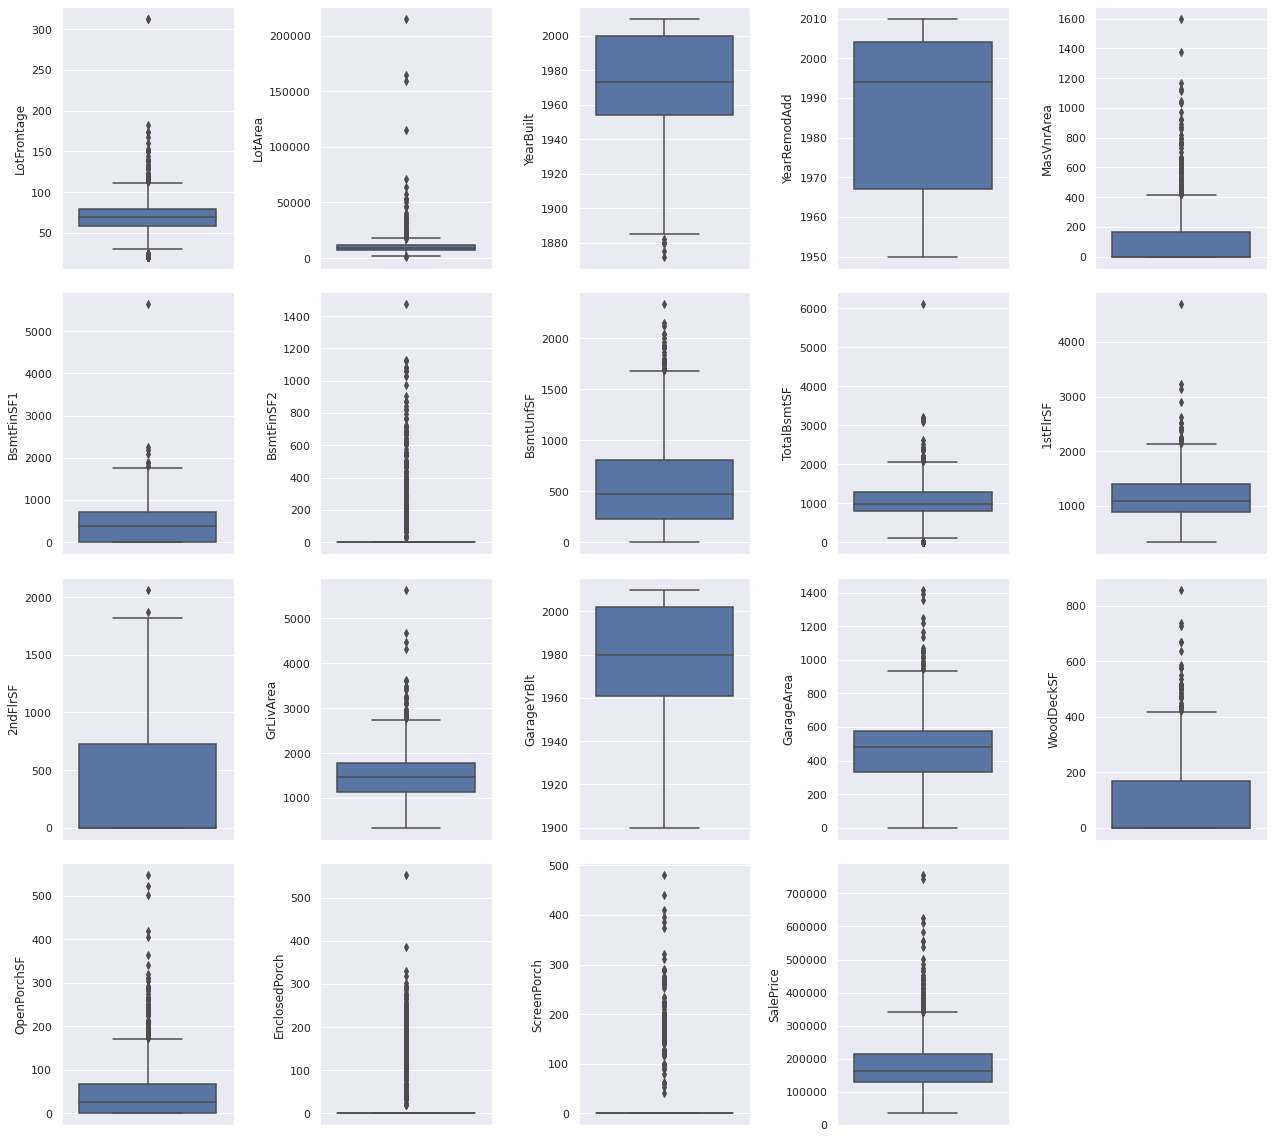

In [420]:
fig = plt.figure(figsize = (18,20))
for i,col in enumerate(num_cont.columns,start=1):
    plt.subplot(5,5,i)
    sns.boxplot(y=num_cont[col].dropna())
fig.tight_layout(pad=1.5)

****Numeric Discrete Features****

In [421]:
num_discr = list(set(numeric_cols)-set(num_cont))
print("There are ", len(num_discr), " numeric discrete columns")

There are  18  numeric discrete columns


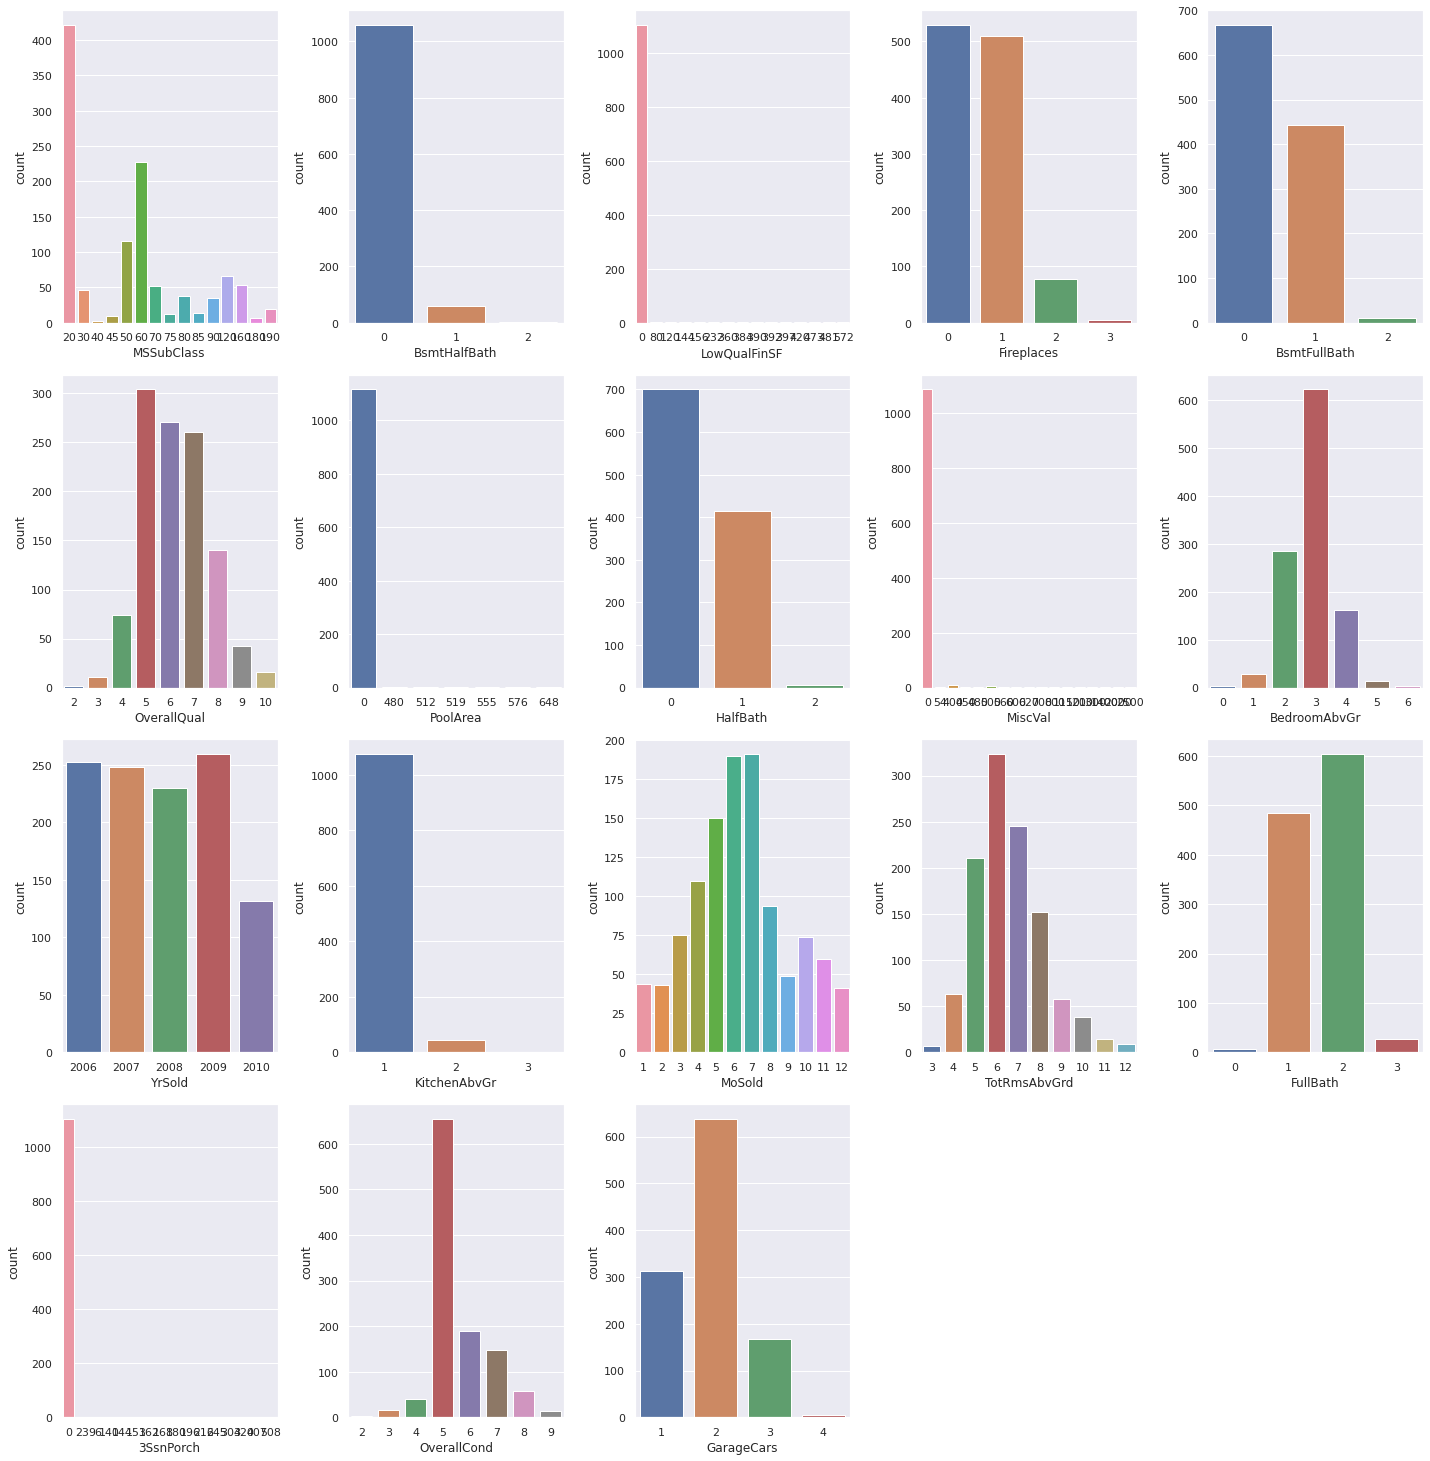

In [422]:
fig = plt.figure(figsize=(25,20))
for i,col in enumerate(num_discr,start=1):
    plt.subplot(5,5,i)
    sns.countplot(x=col, data=numeric_cols.dropna())
fig.tight_layout(pad=1.0)

**Categorical Features**
Breakup Ordinal and nominal?

****Multivariate Comparisons****

In [423]:
#Numeric Correlations
num_corr = numeric_cols.corr()
num_corr["SalePrice"].sort_values(ascending=False).to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


**Target Correlation Heatmap**

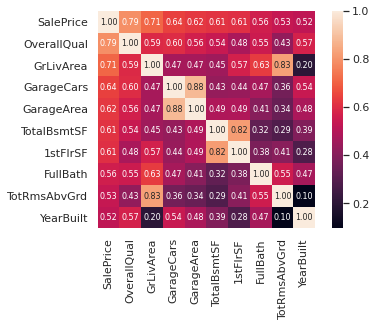

In [424]:
sns.color_palette("rocket", as_cmap=True)
k=10 #number of parameters to consider
#Find indices of variables with highest correlation to Target
ncols = X_full.corr().nlargest(k, 'SalePrice')['SalePrice'].index
vals = np.corrcoef(X_full[ncols].values.T) #tried with df but that messed up the formatting!
hm = sns.heatmap(vals, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 8}, 
                 xticklabels=ncols.values, yticklabels=ncols.values)
#plt.show()

In [425]:
#COULD DELETE LOW CORRELATIONS - add to feature engineering
#X_full.corr().nsmallest(25, 'SalePrice')['SalePrice']

** Feature Correlation Matrix Heatmap**

**Feature/Target Scatter Plots**

**Feature/Feature Pair Plots**

# Data Cleaning

In [426]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y_full = X_full.SalePrice

#Check if any are left
missing_targets = X_full.SalePrice.isnull().sum()
if missing_targets==0:
    print("No missing values in targets")
    X_full.drop(['SalePrice'], axis=1, inplace=True)
else:
    print("Still missing targets")

No missing values in targets


In [427]:
#First combine training and test data for uniform operations
traindex = X_full.shape[0]
testdex = test_data.shape[0]
X_combined_full = pd.concat([X_full,test_data],axis=0)
print("The shape of the combined df: ",X_combined_full.shape)

The shape of the combined df:  (2919, 79)


In [428]:
missing_val_count= X_combined_full.isnull().sum().sort_values(ascending=False)
missing_val_count = missing_val_count.loc[missing_val_count>0]
#print(missing_val_count_by_column[X_combined_full.isnull().sum() > 0])
percent_missing = missing_val_count/X_combined_full.shape[0]
missing_values = pd.concat([missing_val_count,percent_missing],axis=1,keys=['Feature','Percent Missing'])
missing_values.head(len(missing_val_count))

,Feature,Percent Missing
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


In [429]:
sns.barplot(x='Feature',y='Feature', data = missing_val_count)

ValueError: Could not interpret input 'Feature'

In [ ]:
X_combined = X_combined_full.dropna(thresh=0.8*X_combined_full.shape[0],axis=1)
X_combined = X_combined.set_index(X_combined.index) 
print(X_combined_full.shape[1]-X_combined.shape[1], " columns were dropped")

In [ ]:
#Worked strategies
#xcopy2['MasVnrArea']= xcopy2.MasVnrArea.fillna(0)
#X_combined.loc[X_combined.MasVnrArea.isnull()]=0


In [ ]:
#Fill missing values of Garage with year - would doing this to test data be data leakage?
#X_combined.loc[(pd.isnull(X_combined.GarageYrBlt)), 'GarageYrBlt'] = X_combined.YearBuilt
X_combined.loc[(pd.isnull(X_combined.MasVnrArea)),'MasVnrArea']=0
X_combined.MasVnrArea.isnull().sum()
X_combined.loc[(pd.isnull(X_combined.LotFrontage)),'LotFrontage']=0
#X_combined.loc[:,'MasVnrType'].fillna("No Verneer")
#X_combined.loc[:,'LotFrontage'].fillna(X_combined.LotFrontage.median())

In [ ]:
#Fill Garage and Basement NaNs with none
fillnones = ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1',
            'GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageType',
             'MasVnrType']

X_combined[fillnones] = X_combined[fillnones].fillna('none')

In [ ]:
#Backfill columns with only a few missing values
ffill_cols = list(missing_values[missing_values.Feature < 5].index)
X_combined[ffill_cols]=X_combined[ffill_cols].fillna(method='ffill')

In [ ]:
missing_val_count2= X_combined.isnull().sum().sort_values(ascending=False)
missing_val_count2 = missing_val_count2.loc[missing_val_count2>0]
if missing_val_count2.empty:
    print('No more missing values!')
else:
    print('There are still missing values:')
    print(missing_val_count2)

# Feature Engineering
The goal here is to create features that can combine optional features and metrics with those that every feature has to create an even comparison

In [ ]:
#Year Average - incorporates remodel year - WHat about garage year??
X_combined["YearAverage"] = (X_combined["YearRemodAdd"] + X_combined["YearBuilt"])/2
#Squarefootage- could also add deck, porch, etc to this
X_combined["SQFootage"] = X_combined['TotalBsmtSF'] + X_combined['1stFlrSF'] + X_combined['2ndFlrSF'] + X_combined['GrLivArea'] + X_combined['GarageArea']
#Total Bathrooms
X_combined["Bathrooms"] = X_combined["FullBath"] + X_combined["BsmtFullBath"] + 0.5*(X_combined["HalfBath"] + X_combined["BsmtHalfBath"])
#Outdoor Space
X_combined['TotalPorch'] = X_combined['OpenPorchSF'] + X_combined['EnclosedPorch'] + X_combined['ScreenPorch']

In [ ]:
#Drop features with multicollinearity
X_combined.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)
#Drop combined features
X_combined.drop(['FullBath','BsmtFullBath',"HalfBath",'BsmtHalfBath','OpenPorchSF','EnclosedPorch','ScreenPorch','2ndFlrSF','TotalBsmtSF','GrLivArea','GarageArea'],axis=1,inplace=True)
#Values without correlation to Sale Price
X_combined.drop(['YrSold','MoSold'],axis=1,inplace=True)

In [ ]:
#Numeric columns that are categorical- change to string - INCREASED MAE
#X_combined["MSSubClass"]  = X_combined["MSSubClass"].apply(str)

# Categorical Data Encoding****************
* Numerical data that's actually categorical
* One hot encoding

In [ ]:
#X_enc = pd.get_dummies(X_combined)

In [ ]:
#X_ohe = pd.get_dummies(X_combined)
#print("New shape is ",X_enc.shape)

In [ ]:
#Where are all those new columns coming from!?
for col in list(X_combined.select_dtypes(include='object').columns):
    print("In ", col, " there are ", len(X_combined[col].unique()))

In [ ]:
#TEMPPPPPPPP
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_combined.columns if X_combined[cname].nunique() < 10 and X_combined[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_combined.columns if X_combined[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols + ['Neighborhood']
XS = X_combined[my_cols].copy()

In [ ]:
XS = pd.get_dummies(XS)
XS.shape

In [ ]:
#Resplit before scaling to avoid data leakage
X = XS[:traindex]
X_test = XS[traindex:]

print("training set shape is ", X.shape)
print("test set shape is ",X_test.shape)

# Scaling and Reshaping

In [ ]:
from scipy.stats import skew
print("Skewness before log transform: ", y_full.skew())
print("Kurtosis before log transform: ", y_full.kurt())

#Log scale target data to fix the leptokurtic and positive skewed behavior
y_full = np.log(y_full)
print("Skewness after log transform: ", y_full.skew())
print("Kurtosis after log transform: ", y_full.kurt())

In [ ]:
missing_val_count= X.isnull().sum().sort_values(ascending=False)
missing_val_count.loc[missing_val_count>0]

# Cross Validation to Inform Feature Engineering

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor()
scores1 = -1*cross_val_score(model,X,y_full,cv=5,scoring='neg_mean_absolute_error').mean()
print(scores1)

 **Hyperparameter Optimization**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y_full, test_size=0.2)

In [ ]:
#Define Possible Parameters
parameters = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3],
    'n_estimators' : [100,500,1000,2000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10],
    'alpha' : [0.001, 0.01, 0.1],
}
#Grid Search Parameters
opt_pars = RandomizedSearchCV(estimator = model, param_distributions = parameters,n_iter=50,scoring = 'neg_root_mean_squared_error',cv=4)

#Fit model
fitted = opt_pars.fit(X_train,y_train)

#Best Parameters
best_score = fitted.best_score_
best_params = fitted.best_params_

model = XGBRegressor(**best_params)
model.fit(X,y_full)
scores2 = -1*cross_val_score(model,X,y_full,cv=5,scoring='neg_mean_absolute_error').mean()
print(scores2)

In [ ]:
preds = np.exp(model.predict(X_test))

In [ ]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds})
output.to_csv('submission.csv', index=False)

In [ ]:
best_params

In [ ]:
best_score

In [ ]:
print(output)